# Analyze the influence of tolerance parameters

Including:
* The precursor mz tolerance;
* The fragment ion tolerance

In [38]:
import os
import numpy as np
import functools
import nb_utils
import config

exact_sparse_matrix = nb_utils.exact_sparse_matrix
extract_nondiag_values = nb_utils.extract_nondiag_values

In [39]:
sp_path = os.path.abspath('/home/maesk/MasterThesis/falcon/work_dir_SSD/CCLE_F01-F04/spectra')
charge = 2
prefix = 'CCLE_F01-F04'

prec_mz_tols = np.array([20, 30, 40, 50])
fragm_ion_tols = np.array([0.05, 0.20, 0.35, 0.50])

X, Y = np.meshgrid(prec_mz_tols, fragm_ion_tols)

dist_av = np.zeros( (len(prec_mz_tols), len(fragm_ion_tols)) )
dist_25 = np.zeros( (len(prec_mz_tols), len(fragm_ion_tols)) )
dist_50 = np.zeros( (len(prec_mz_tols), len(fragm_ion_tols)) )
dist_75 = np.zeros( (len(prec_mz_tols), len(fragm_ion_tols)) )

for i in range(len(prec_mz_tols)):
    for j in range(len(fragm_ion_tols)):
        #print(fragm_ion_tols[j])
        fun_dist = functools.partial(
            nb_utils.hdvectors_distance,
            hdvectors_min_mz = config.min_mz,
            hdvectors_max_mz = config.max_mz,
            hdvectors_fragment_mz_tolerance = Y[i,j]
        )
        dist_mat, _ = exact_sparse_matrix(sp_path, charge, X[i,j], fun_dist)
        curr_dists = extract_nondiag_values(dist_mat)
        curr_dists.sort()

        # Store the average distance
        dist_av[i,j] = np.mean(curr_dists)

        i_25 = int(round(0.25*len(curr_dists))) # The first quartile
        dist_25[i,j] = curr_dists[i_25]

        i_50 = int(round(0.50*len(curr_dists)))
        dist_50[i,j] = curr_dists[i_50]

        i_75 = int(round(0.75*len(curr_dists)))
        dist_75[i,j] = curr_dists[i_75]

  0%|          | 0/68073 [00:00<?, ?it/s]

  0%|          | 0/67871 [00:00<?, ?it/s]

  0%|          | 0/68073 [00:00<?, ?it/s]

  0%|          | 0/67871 [00:00<?, ?it/s]

  0%|          | 0/68073 [00:00<?, ?it/s]

  0%|          | 0/67871 [00:00<?, ?it/s]

  0%|          | 0/68073 [00:00<?, ?it/s]

  0%|          | 0/67871 [00:00<?, ?it/s]

  0%|          | 0/68073 [00:00<?, ?it/s]

  0%|          | 0/67871 [00:00<?, ?it/s]

  0%|          | 0/68073 [00:00<?, ?it/s]

  0%|          | 0/67871 [00:00<?, ?it/s]

  0%|          | 0/68073 [00:00<?, ?it/s]

  0%|          | 0/67871 [00:00<?, ?it/s]

  0%|          | 0/68073 [00:00<?, ?it/s]

  0%|          | 0/67871 [00:00<?, ?it/s]

  0%|          | 0/68073 [00:00<?, ?it/s]

  0%|          | 0/67871 [00:00<?, ?it/s]

  0%|          | 0/68073 [00:00<?, ?it/s]

  0%|          | 0/67871 [00:00<?, ?it/s]

  0%|          | 0/68073 [00:00<?, ?it/s]

  0%|          | 0/67871 [00:00<?, ?it/s]

  0%|          | 0/68073 [00:00<?, ?it/s]

  0%|          | 0/67871 [00:00<?, ?it/s]

  0%|          | 0/68073 [00:00<?, ?it/s]

  0%|          | 0/67871 [00:00<?, ?it/s]

  0%|          | 0/68073 [00:00<?, ?it/s]

  0%|          | 0/67871 [00:00<?, ?it/s]

  0%|          | 0/68073 [00:00<?, ?it/s]

  0%|          | 0/67871 [00:00<?, ?it/s]

  0%|          | 0/68073 [00:00<?, ?it/s]

  0%|          | 0/67871 [00:00<?, ?it/s]

In [42]:
# Export the results
import pickle

r = {'dist_av': dist_av,
     'dist_25': dist_25,
     'dist_50': dist_50,
     'dist_75': dist_75}

with open(os.path.join('compareTolerances', f'{prefix}_16.pkl'), 'wb') as f:
    pickle.dump(r, f)

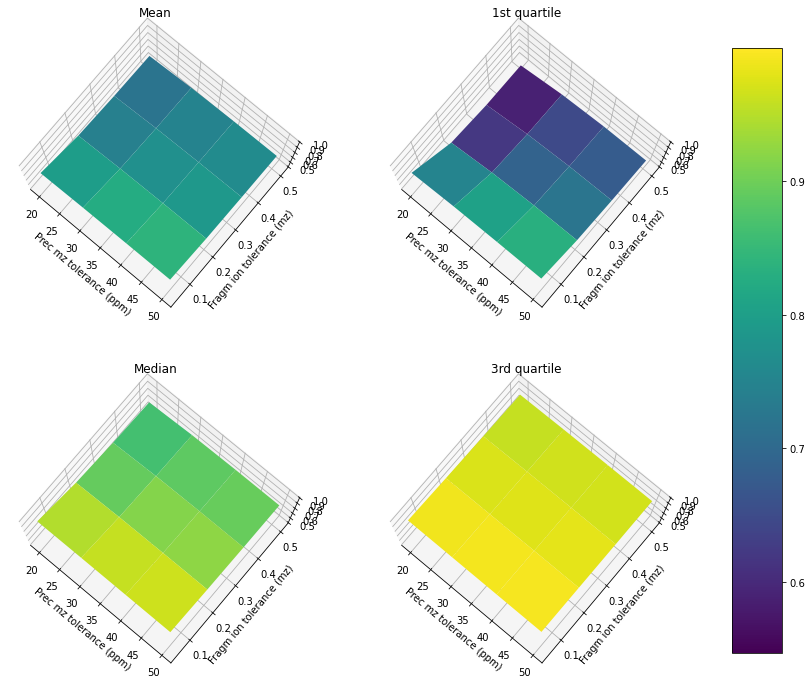

In [74]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axs = plt.subplots(2,2, figsize = (14,12), subplot_kw={"projection": "3d"})
dists = [dist_av, dist_25, dist_50, dist_75]
titles = ["Mean", "1st quartile", "Median", "3rd quartile"]

for i, j, d, t in zip([0,0,1,1], [0,1,0,1], dists, titles):
    im = axs[i,j].plot_surface(X, Y, d,
                          rstride=1, cstride=1, cmap=cm.viridis,
                          vmin=np.min(dist_25), vmax=np.max(dist_75))
    axs[i,j].set(title=t)


a1 = 80
a2 = -50
zlim = [0.5, 1]
for i in range(2):
    for j in range(2):
        axs[i,j].set(xlabel="Prec mz tolerance (ppm)",
                     ylabel="Fragm ion tolerance (mz)")
        axs[i,j].set_zlim(zlim[0], zlim[1])
        axs[i,j].view_init(a1, a2)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.savefig(os.path.join('compareTolerances', f'{prefix}_zlim{zlim[0]}-{zlim[1]}_{a1}_{a2}.png'), dpi=300)
plt.show()